**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC5053 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: ISRAEL PARRA RANGEL
*   MATRÍCULA: A01797735

En esta actividad trabajarás con el archivo `heart_disease.csv`, basado en un conjunto de datos sobre pacientes y variables clínicas relacionadas con enfermedades cardíacas, disponible en Kaggle.

Los datos fueron recopilados para analizar la presencia de enfermedades cardíacas en los pacientes y contienen información demográfica, clínica y resultados de pruebas diagnósticas. Los indicadores incluidos son:

* `id`: Identificador único de cada paciente
* `age`: Edad del paciente en años
* `origin`: Lugar de estudio
* `sex`: Masculino / Femenino
* `cp`: Tipo de dolor torácico (angina típica, angina atípica, no anginal, asintomático)
* `trestbps`: Presión arterial en reposo (en mm Hg al ingreso al hospital)
* `chol`: Colesterol sérico en mg/dl
* `fbs`: Si el azúcar en ayunas > 120 mg/dl
* `restecg`: Resultados del electrocardiograma en reposo (normal, anomalía ST-T, hipertrofia ventricular izquierda)
* `thalach`: Frecuencia cardíaca máxima alcanzada
* `exang`: Angina inducida por ejercicio (Verdadero / Falso)
* `oldpeak`: Depresión del segmento ST inducida por ejercicio respecto al reposo
* `slope`: Pendiente del segmento ST en el pico de ejercicio
* `ca`: Número de vasos principales coloreados por fluoroscopía (0 - 3)
* `thal`: Resultado de la prueba de perfusión cardíaca (normal, defecto fijo, defecto reversible)
* `num`: Indica si el paciente tiene o no enfermedad cardíaca, o el grado de enfermedad (0 = sano, 1 - 4 = enfermedad) Es la variable de salida o *target*, es decir, la que se pretende predecir más adelante al construir el modelo.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.

In [7]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer

1. Descarga el archivo: `heart_disease.csv` y guarda, en un dataframe (`cardio_df`), todos sus registros.
* Haz que la columna `id` sea el índice del dataframe.
* Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas de texto?
* Determina la cantidad de valores únicos por columna.

In [8]:
#Hacer que la columna id sea el índice del df
cardio_df = pd.read_csv('heart_disease.csv', index_col='id')
cardio_df.info()

print("\nValores únicos por columna:")
print(cardio_df.nunique())

# Determino el numero de columnas numericas y de texto
numerical_cols = cardio_df.select_dtypes(include=np.number).shape[1]
text_cols = cardio_df.select_dtypes(include='object').shape[1]

print(f"\nNúmero de columnas numéricas: {numerical_cols}")
print(f"Número de columnas de texto: {text_cols}")

#Número de columnas numéricas: 7 - Número de columnas de texto: 8
#Valores únicos por columna:
#age          50
#sex           2
#origin        4
#cp            4
#trestbps     60
#chol        216
#fbs           2
#restecg       3
#thalch      119
#exang         2
#oldpeak      53
#slope         3
#ca            4
#thal          3
#num           5


<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       918 non-null    int64  
 1   sex       918 non-null    object 
 2   origin    918 non-null    object 
 3   cp        918 non-null    object 
 4   trestbps  859 non-null    float64
 5   chol      888 non-null    float64
 6   fbs       829 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    863 non-null    float64
 9   exang     863 non-null    object 
 10  oldpeak   856 non-null    float64
 11  slope     610 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       918 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 114.8+ KB

Valores únicos por columna:
age          50
sex           2
origin        4
cp            4
trestbps     60
chol        216
fbs           2
restecg       3
thalch      119


2. Examina las variables numéricas que presentan pocos valores únicos, ya que esto puede indicar que en realidad se tratan de variables categóricas codificadas como números.
* Si existen casos de este tipo, conviértelas a categóricas. Antes de hacerlo, revisa sus descripciones para determinar si son ordinales o nominales y, si son ordinales, establece el orden correcto de las categorías.

In [31]:
print("valores unicos en 'num':", cardio_df['num'].unique())
print("cuenta valores 'num':\n", cardio_df['num'].value_counts())
print("\nUnique valores en 'ca':", cardio_df['ca'].unique())
print("cuenta valores para 'ca':\n", cardio_df['ca'].value_counts())

# num representa el grado de enfermedad cardíaca (0-4), que es ordinal.
# ca representa el número de vasos sanguíneos principales (0-3), que también es ordinal

cardio_df['num'] = pd.Categorical(cardio_df['num'], categories=[0, 1, 2, 3, 4], ordered=True)
cardio_df['ca'] = pd.Categorical(cardio_df['ca'], categories=[0.0, 1.0, 2.0, 3.0], ordered=True)

cardio_df.info()

valores unicos en 'num': [0, 2, 1, 3, 4]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]
cuenta valores 'num':
 num
0    411
1    263
2    109
3    107
4     28
Name: count, dtype: int64

Unique valores en 'ca': [0.0, 3.0, 2.0, 1.0, NaN]
Categories (4, float64): [0.0 < 1.0 < 2.0 < 3.0]
cuenta valores para 'ca':
 ca
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       918 non-null    int64   
 1   sex       918 non-null    object  
 2   origin    918 non-null    object  
 3   cp        918 non-null    object  
 4   trestbps  859 non-null    float64 
 5   chol      888 non-null    float64 
 6   fbs       829 non-null    object  
 7   restecg   918 non-null    object  
 8   thalch    863 non-null    float64 
 9   exang     863 non-null    object  
 10  oldpeak   856 non-null    float64

3. Obtén las estadísticas descriptivas de las variables, realizando el análisis por separado para las variables numéricas y las categóricas.
* Para las numéricas, incluye el sesgo y la curtosis.
* Para las categóricas, imprime además las tablas de frecuencia.

In [10]:
numerical_summary = cardio_df.select_dtypes(include=np.number).agg(['count', 'mean', 'std', 'min', 'max', 'skew', 'kurtosis']).transpose()
print("Estadisticas descriptivas para las variables numericas:")
display(numerical_summary)

# Obtener estadistica descriptiva para variables categoricas
categorical_cols = cardio_df.select_dtypes(include='object').columns
print("\nEstdistica descriptiva y tablas de frecuencias:")
for col in categorical_cols:
    print(f"\nColumna: {col}")
    display(cardio_df[col].describe())
    print(f"Frecuencia {col}:")
    display(cardio_df[col].value_counts())

categorical_cols_converted = cardio_df.select_dtypes(include='category').columns
print("\nEstadistica descriptiva y tablas de frecuencia convertidas a variables categoricas:")
for col in categorical_cols_converted:
    print(f"\nColumna: {col}")
    display(cardio_df[col].describe())
    print(f"Tabla frecuencia {col}:")
    display(cardio_df[col].value_counts())

Estadisticas descriptivas para las variables numericas:


,count,mean,std,min,max,skew,kurtosis
age,918.0,53.530501,9.412783,28.0,77.0,-0.193710,-0.382511
trestbps,859.0,132.294529,18.535875,80.0,200.0,0.630411,0.632992
chol,888.0,242.189189,53.424806,85.0,603.0,1.640672,6.573848
thalch,863.0,137.528389,25.950226,60.0,202.0,-0.209319,-0.483939
oldpeak,856.0,0.880607,1.091840,-2.6,6.2,1.037990,1.119834



Estdistica descriptiva y tablas de frecuencias:

Columna: sex


,sex
count,918
unique,2
top,Male
freq,724


Frecuencia sex:


,count
sex,
Male,724
Female,194



Columna: origin


,origin
count,918
unique,4
top,Cleveland
freq,304


Frecuencia origin:


,count
origin,
Cleveland,304
Hungary,292
VA Long Beach,200
Switzerland,122



Columna: cp


,cp
count,918
unique,4
top,asymptomatic
freq,495


Frecuencia cp:


,count
cp,
asymptomatic,495
non-anginal,204
atypical angina,174
typical angina,45



Columna: fbs


,fbs
count,829
unique,2
top,False
freq,691


Frecuencia fbs:


,count
fbs,
False,691
True,138



Columna: restecg


,restecg
count,918
unique,3
top,normal
freq,551


Frecuencia restecg:


,count
restecg,
normal,551
lv hypertrophy,188
st-t abnormality,179



Columna: exang


,exang
count,863
unique,2
top,False
freq,526


Frecuencia exang:


,count
exang,
False,526
True,337



Columna: slope


,slope
count,610
unique,3
top,flat
freq,345


Frecuencia slope:


,count
slope,
flat,345
upsloping,202
downsloping,63



Columna: thal


,thal
count,434
unique,3
top,normal
freq,196


Frecuencia thal:


,count
thal,
normal,196
reversable defect,192
fixed defect,46



Estadistica descriptiva y tablas de frecuencia convertidas a variables categoricas:

Columna: ca


,ca
count,309.0
unique,4.0
top,0.0
freq,181.0


Tabla frecuencia ca:


,count
ca,
0.0,181
1.0,67
2.0,41
3.0,20



Columna: num


,num
count,918
unique,5
top,0
freq,411


Tabla frecuencia num:


,count
num,
0,411
1,263
2,109
3,107
4,28


4. Calcula el porcentaje de valores faltantes en cada columna.
* Elimina aquellas columnas cuyo porcentaje de valores faltantes supere el 30%.
* Crea un mapa de calor que visualice la distribución de los valores faltantes en todas las columnas restantes.
* Algunas variables presentan valores faltantes de manera simultánea; es decir, en el mapa se pueden identificar filas donde varias están ausentes al mismo tiempo. Enumera cuáles son dichas variables e investiga si esta concurrencia tiene sentido desde un punto de vista médico o clínico.

Percentage of missing values per column:
age          0.000000
sex          0.000000
origin       0.000000
cp           0.000000
trestbps     6.427015
chol         3.267974
fbs          9.694989
restecg      0.000000
thalch       5.991285
exang        5.991285
oldpeak      6.753813
slope       33.551198
ca          66.339869
thal        52.723312
num          0.000000
dtype: float64

Columnas con más del 30% faltante): ['slope', 'ca', 'thal']


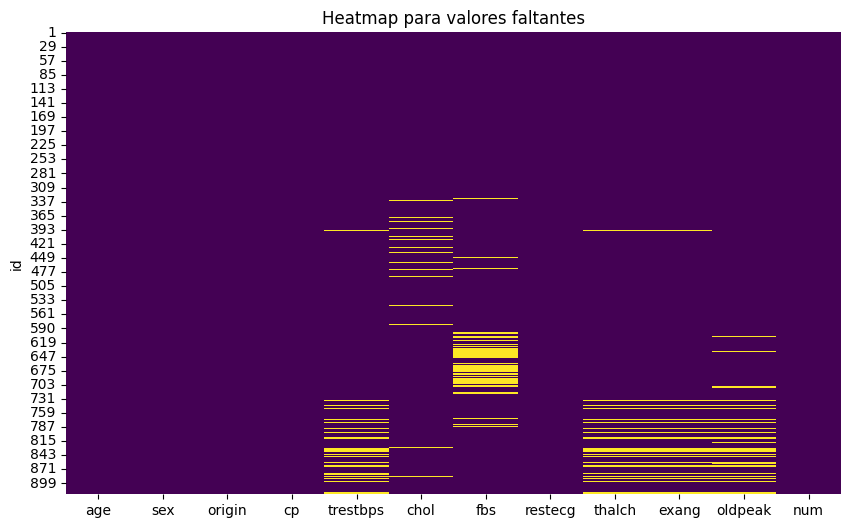


Variables que presentan valores perdidos simultaneamente:
exang     trestbps    0.963267
trestbps  exang       0.963267
          thalch      0.963267
thalch    trestbps    0.963267
exang     oldpeak     0.919740
oldpeak   exang       0.919740
          thalch      0.919740
thalch    oldpeak     0.919740
trestbps  oldpeak     0.902999
oldpeak   trestbps    0.902999
dtype: float64


In [47]:
# % de valores faltantes
porcentaje_faltante = (cardio_df.isnull().sum() / len(cardio_df)) * 100
print("Percentage of missing values per column:")
print(porcentaje_faltante)

cols_to_drop = porcentaje_faltante[porcentaje_faltante > 30].index.tolist()
print(f"\nColumnas con más del 30% faltante): {cols_to_drop}")

cardio_df_cleaned = cardio_df.drop(columns=cols_to_drop)

# Creacion de mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(cardio_df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap para valores faltantes')
plt.show()

# Enumera cuáles son dichas variables e investiga si esta concurrencia tiene sentido desde un punto de vista médico o clínico.
print("\nVariables que presentan valores perdidos simultaneamente:")
missing_corr = cardio_df_cleaned.isnull().corr()

missing_corr_stacked = missing_corr.stack().sort_values(ascending=False)

high_missing_corr = missing_corr_stacked[(missing_corr_stacked > 0.5) & (missing_corr_stacked < 1)]
print(high_missing_corr)

#Se identifica una correlción alta entre los valores que hacen referencia a sangrado con falta de valor en presión arterial (trestbps), tambie´n l alta correlación entre
#thalch con la presión alterrial puede identificarse conmo normal dado que si se omite la medición de frecuencia cardiaca puede estarse omitiendo la toma de dato de presión arterial


5. Si centramos el análisis en una de las variables identificadas en el ejercicio anterior, se puede suponer que los hallazgos obtenidos podrían ser aplicables a las demás variables que presentan un patrón similar.

* ¿Tendrán los valores faltantes de `thalch` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
  *   Numéricas: `age`, `chol`
  *   Categóricas: `restecg`, `cp`

Para ello deberás dividir cada columna en dos grupos: con / sin faltantes en `thalch` y utilizar métodos gráficos y pruebas de hipótesis para ver si hay diferencias significativas.
* Incluye las conclusiones del análisis con los resultados obtenidos.
* Justifica si el mecanismo de faltantes de `thalch` es MCAR (*Missing Completely at Random*) o MAR (*Missing at Random*).

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [35]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'Con valores faltantes',False:'Sin valores faltantes'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [36]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'Con valores faltantes',False:'Sin valores faltantes'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

Analisis de valores faltantes en 'thalch' vs 'age':


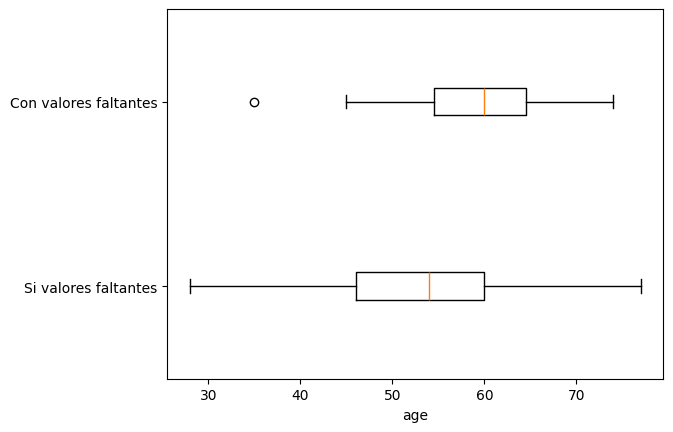

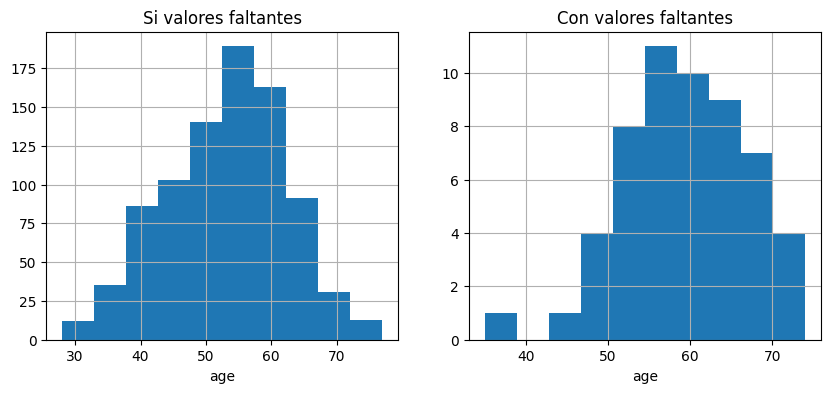

p-value of t-test: 1.5041244185890902e-06

Analisis de valores faltantes en 'thalch' vs 'chol':


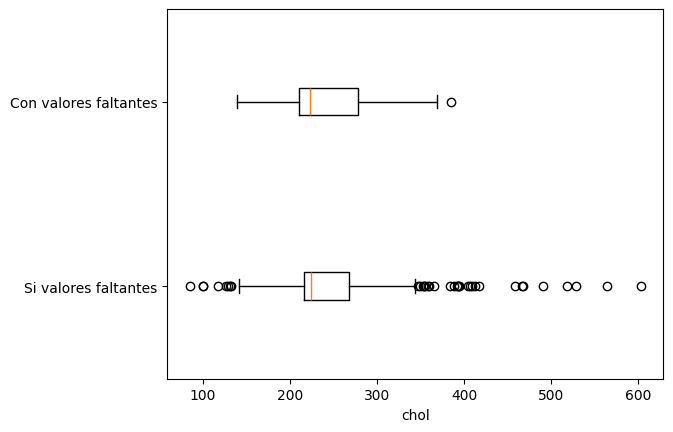

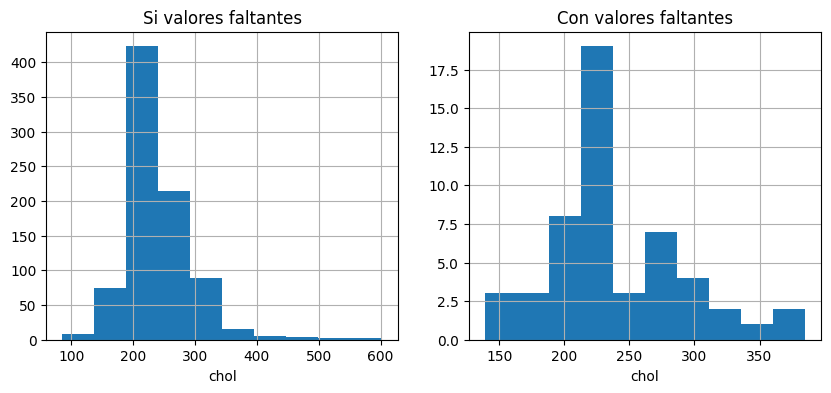

p-value of t-test: 0.7165289974295672

Analisis de valores faltantes en 'thalch' vs 'restecg':


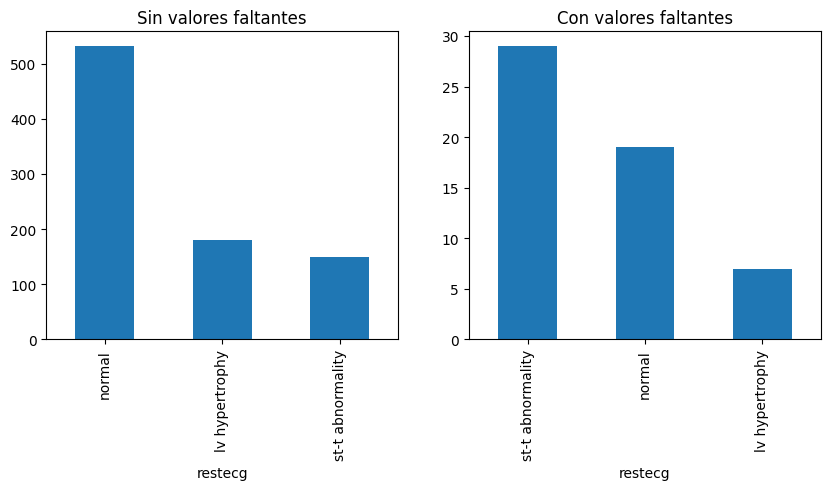

p-value of Chi_squared test: 1.1472889573985467e-09

Analisis de valores faltantes en 'thalch' vs 'cp':


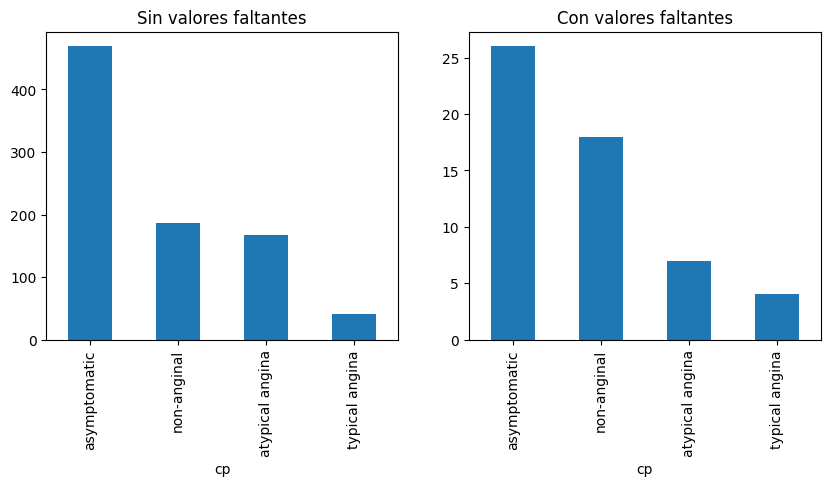

p-value of Chi_squared test: 0.15420097177251701


In [38]:
# Analisis de valores faltantes en 'thalch' vs 'age' (numerical)
print("Analisis de valores faltantes en 'thalch' vs 'age':")
Diagnose_MV_Numerical(cardio_df_cleaned, 'age', cardio_df_cleaned['thalch'].isnull())

# Analisis de valores faltantes en 'thalch' vs 'chol' (numerical)
print("\nAnalisis de valores faltantes en 'thalch' vs 'chol':")
Diagnose_MV_Numerical(cardio_df_cleaned, 'chol', cardio_df_cleaned['thalch'].isnull())

# Analisis de valores faltantes en 'thalch' vs 'restecg' (categorical)
print("\nAnalisis de valores faltantes en 'thalch' vs 'restecg':")
Diagnose_MV_Categorical(cardio_df_cleaned, 'restecg', cardio_df_cleaned['thalch'].isnull())

# Analisis de valores faltantes en 'thalch' vs 'cp' (categorical)
print("\nAnalisis de valores faltantes en 'thalch' vs 'cp':")
Diagnose_MV_Categorical(cardio_df_cleaned, 'cp', cardio_df_cleaned['thalch'].isnull())

#El análisis mostró una diferencia estadísticamente significativa en la distribución de "age" y "restecg"
#entre los grupos con y sin valores faltantes en "thalch" (los valores p-value fueron muy bajos).
#Esto indica que la ausencia de "thalch" está relacionada con los valores de "edad" y "restecg".
#Dado que la ausencia de thalch depende de otras variables del conjunto de datos (edad y restecg),
#es probable que el mecanismo sea MAR (falta aleatoria). No considero que es MCAR ya que la ausencia no es independiente de todas las demás variables.
#Tampoco es necesariamente NMAR (no falta aleatoria), ya que no hemos investigado si la ausencia depende del propio valor de thalch, si este se observara.


6. La imputación de una variable con valores faltantes puede realizarse por grupos o segmentos relevantes. Esto significa que, en lugar de utilizar una estadística global de toda la columna, se calcula la estadística correspondiente dentro de cada grupo definido por otra variable, haciendo:

> `df['var_with_missing'] = df.groupby('related_var')['var_with_missing'].transform(lambda x: x.fillna(x.median()))`

* Utiliza la variable `restecg` para separar los grupos e imputar `thalch` y todas las variables con patrón de faltantes similar (identificadas en el ejercicio 3) Asegúrate de cambiar la función de agregado si hay variables no numéricas.
* Vuelve a generar el mapa de calor para verificar que los valores faltantes en estas variables hayan sido imputados.

/tmp/ipython-input-372047757.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cardio_df_cleaned['exang'] = cardio_df_cleaned.groupby('restecg')['exang'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))


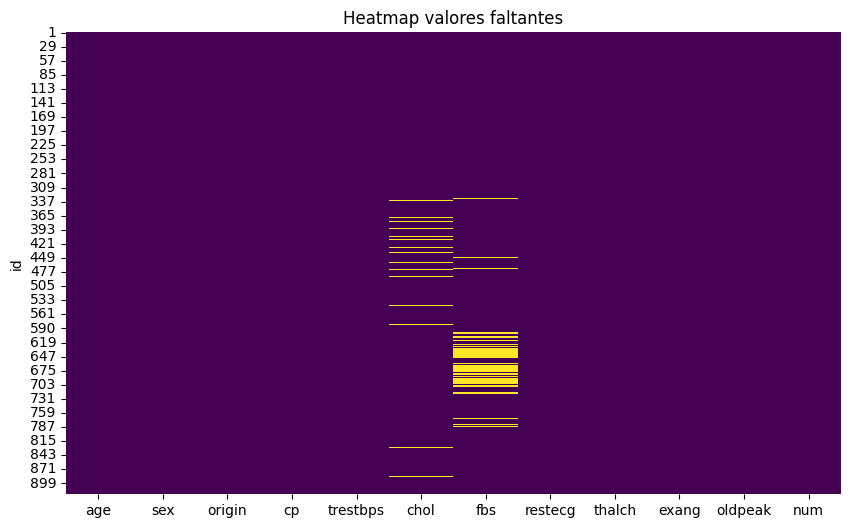

In [39]:
for col in ['thalch', 'trestbps', 'oldpeak']:
    cardio_df_cleaned[col] = cardio_df_cleaned.groupby('restecg')[col].transform(lambda x: x.fillna(x.median()))

cardio_df_cleaned['exang'] = cardio_df_cleaned.groupby('restecg')['exang'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Mapa de calor para verificr imputación
plt.figure(figsize=(10, 6))
sns.heatmap(cardio_df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap valores faltantes')
plt.show()

8. Dibuja boxplots de todas las variables numéricas.
* Obtén los valores atípicos mediante el método gráfico, a partir del objeto devuelto por el boxplot.

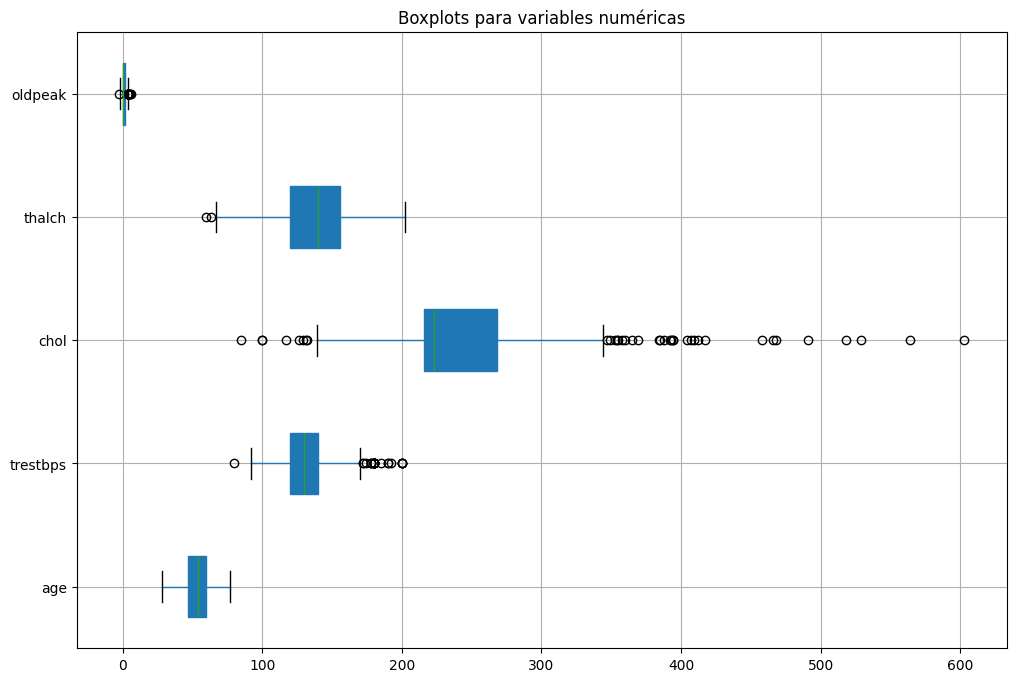


Outliers identificados usando gráfica:
'trestbps': [80.0, 172.0, 180.0, 200.0, 174.0, 178.0, 192.0, 180.0, 178.0, 180.0, 190.0, 180.0, 180.0, 180.0, 180.0, 200.0, 180.0, 180.0, 180.0, 200.0, 185.0, 200.0, 180.0, 178.0, 172.0, 180.0, 190.0]
'chol': [126.0, 131.0, 132.0, 129.0, 100.0, 85.0, 117.0, 100.0, 354.0, 353.0, 417.0, 360.0, 407.0, 564.0, 394.0, 409.0, 358.0, 412.0, 468.0, 365.0, 394.0, 347.0, 466.0, 529.0, 392.0, 355.0, 603.0, 404.0, 518.0, 388.0, 491.0, 393.0, 458.0, 384.0, 349.0, 369.0, 385.0]
'thalch': [60.0, 63.0]
'oldpeak': [-2.6, 6.2, 4.0, 5.6, 4.0, 4.2, 4.2, 3.8, 4.4, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0]


In [40]:
numerical_cols = cardio_df_cleaned.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 8))
boxplot = cardio_df_cleaned[numerical_cols].boxplot(vert=False, patch_artist=True, return_type='dict')

outliers = {}
flier_artists = boxplot['fliers']
for i, col in enumerate(numerical_cols):
    flier_points = flier_artists[i].get_xdata()
    if flier_points.size > 0:
        outliers[col] = flier_points.tolist()

plt.title('Boxplots para variables numéricas')
plt.show()

print("\nOutliers identificados usando gráfica:")
for col, outlier_list in outliers.items():
    print(f"'{col}': {outlier_list}")

7. Para las variables que aún presentan valores faltantes, realiza la imputación utilizando estadísticas generales calculadas sobre toda la columna, sin segmentar por grupos. Esta vez utiliza la clase `SimpleImputer` de sklearn
* Justifica la estrategia (*mean, median, most_frequent*) que emplees en cada caso.


% de valores faltantes despues de la imputación:
age         0.000000
sex         0.000000
origin      0.000000
cp          0.000000
trestbps    6.427015
chol        0.000000
fbs         0.000000
restecg     0.000000
thalch      5.991285
exang       5.991285
oldpeak     6.753813
num         0.000000
dtype: float64


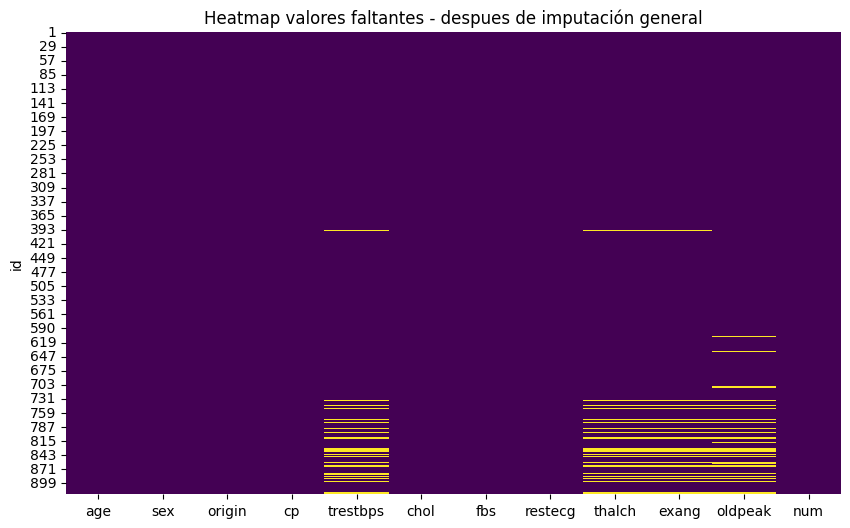

In [49]:
from sklearn.impute import SimpleImputer

imputer_median = SimpleImputer(strategy='median')
cardio_df_cleaned['chol'] = imputer_median.fit_transform(cardio_df_cleaned[['chol']]).ravel()

imputer_mode = SimpleImputer(strategy='most_frequent')
cardio_df_cleaned['fbs'] = imputer_mode.fit_transform(cardio_df_cleaned[['fbs']]).ravel()

print("% de valores faltantes despues de la imputación:")
print(cardio_df_cleaned.isnull().sum() / len(cardio_df_cleaned) * 100)

# Mapa de calor de verificación de que todos los valores faltantes han sido imputados
plt.figure(figsize=(10, 6))
sns.heatmap(cardio_df_cleaned.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap valores faltantes - despues de imputación general')
plt.show()

#Para la variable numérica chol, utilicé la estrategia de la mediana con SimpleImputer.
#vi que podí ser buena opción para datos numéricos, incluso cuando contiene valores atípicos ya que la mediana es menos sensible a los valores extremos que la media.

#Para la variable categórica fbs, utilicé most_frequent con SimpleImputer que es el enfoque estándar para imputar valores
#faltantes en variables categóricas, ya que reemplaza los valores faltantes con la moda (la categoría más frecuente).

9. Para la variable `trestbps`, calcula los valores atípicos utilizando el método del rango intercuartílico (IQR).
* Para ello obtén los cuartiles necesarios y determina los límites superior e inferior para filtrar los valores que se encuentren fuera de ese rango.
* Verifica si los resultados coinciden con los obtenidos en el ejercicio anterior.

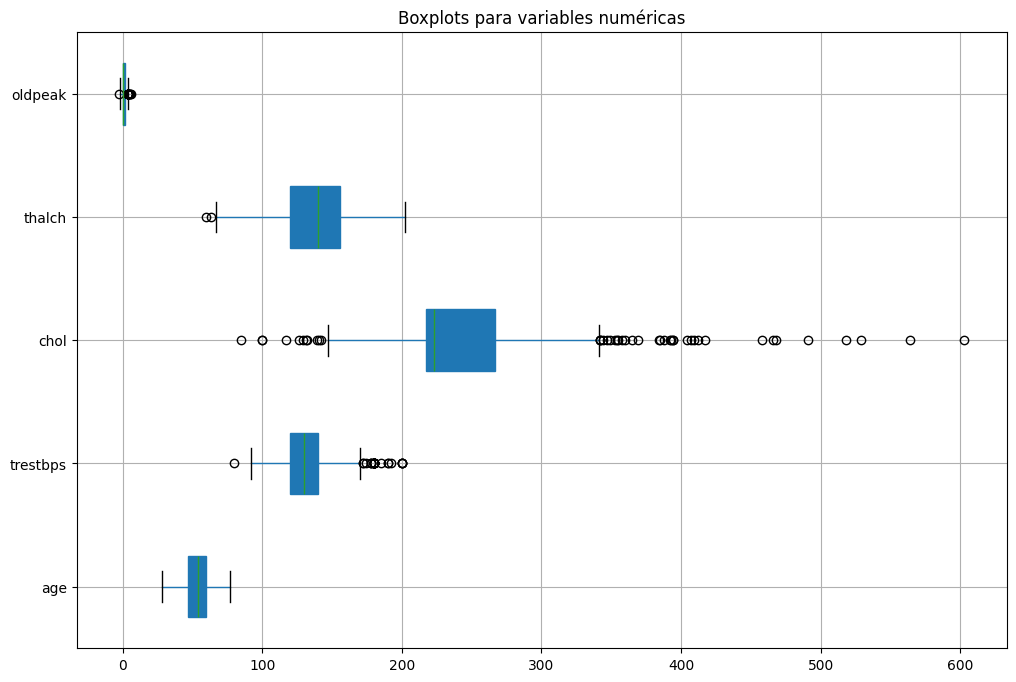


Outliers identificados usando gráfica:
'trestbps': [80.0, 172.0, 180.0, 200.0, 174.0, 178.0, 192.0, 180.0, 178.0, 180.0, 190.0, 180.0, 180.0, 180.0, 180.0, 200.0, 180.0, 180.0, 180.0, 200.0, 185.0, 200.0, 180.0, 178.0, 172.0, 180.0, 190.0]
'chol': [141.0, 126.0, 131.0, 132.0, 129.0, 100.0, 85.0, 117.0, 100.0, 142.0, 139.0, 354.0, 353.0, 417.0, 360.0, 407.0, 564.0, 394.0, 409.0, 342.0, 358.0, 412.0, 468.0, 365.0, 344.0, 394.0, 347.0, 466.0, 529.0, 392.0, 355.0, 603.0, 342.0, 404.0, 518.0, 388.0, 491.0, 342.0, 393.0, 458.0, 384.0, 349.0, 369.0, 385.0]
'thalch': [60.0, 63.0]
'oldpeak': [-2.6, 6.2, 4.0, 5.6, 4.0, 4.2, 4.2, 3.8, 4.4, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0, 4.0]


In [42]:
numerical_cols = cardio_df_cleaned.select_dtypes(include=np.number).columns

plt.figure(figsize=(12, 8))
boxplot = cardio_df_cleaned[numerical_cols].boxplot(vert=False, patch_artist=True, return_type='dict')
outliers = {}
flier_artists = boxplot['fliers']
for i, col in enumerate(numerical_cols):
    flier_points = flier_artists[i].get_xdata()
    if flier_points.size > 0:
        outliers[col] = flier_points.tolist()

plt.title('Boxplots para variables numéricas')
plt.show()

print("\nOutliers identificados usando gráfica:")
for col, outlier_list in outliers.items():
    print(f"'{col}': {outlier_list}")

    #Los resultados (outliers) en general si conciden con el ejercico anterior salvo una ligera diferencia en "chol" al utiliuzar IQR toma un outlier adicional (141)



10. Elimina los valores atípicos identificados de la variable `trestbps`.
* Dibuja el boxplot final para visualizar la distribución depurada.

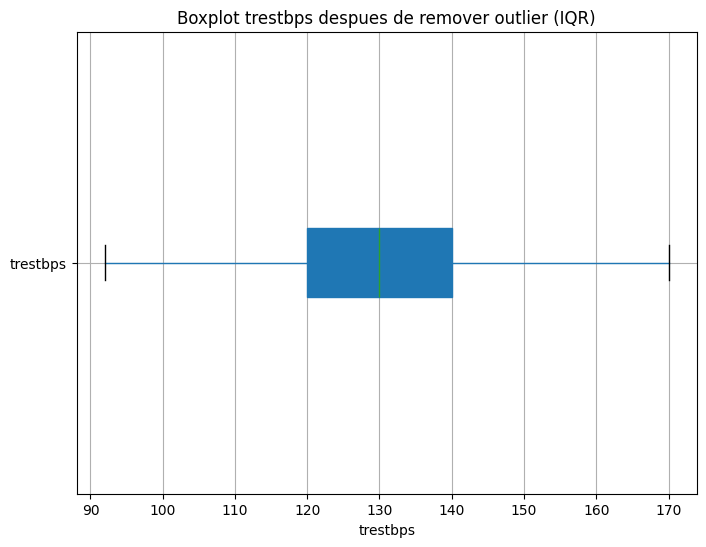

DataFrame antes de la eliminación de valores atípicos: (918, 12)
DataFrame después de la eliminación de valores atípicos: (891, 12)


In [46]:
Q1 = cardio_df_cleaned['trestbps'].quantile(0.25)
Q3 = cardio_df_cleaned['trestbps'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

cardio_df_cleaned_no_outliers = cardio_df_cleaned[(cardio_df_cleaned['trestbps'] >= limite_inferior) & (cardio_df_cleaned['trestbps'] <= limite_superior)].copy()

# boxplot 'trestbps' al remover outliers
plt.figure(figsize=(8, 6))
cardio_df_cleaned_no_outliers.boxplot(column='trestbps', vert=False, patch_artist=True)
plt.title('Boxplot trestbps despues de remover outlier (IQR)')
plt.xlabel('trestbps')
plt.show()

print(f"DataFrame antes de la eliminación de valores atípicos: {cardio_df_cleaned.shape}")
print(f"DataFrame después de la eliminación de valores atípicos: {cardio_df_cleaned_no_outliers.shape}")